In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [ ]:
from google.colab import drive

drive.mount('/content/drive')  # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, target_size=image_size, color_mode='grayscale')  # Load as 128x128 grayscale
            img = img_to_array(img)  # Convert to numpy array
            img = img / 255.0  # Normalize to [0,1]

            # 🚀 Ensure the image shape is exactly (128, 128, 1)
            img = np.reshape(img, (image_size[0], image_size[1], 1))

            images.append(img)

    images_array = np.array(images, dtype=np.float32)

    # 🚀 Print the final shape to confirm correctness
    print(f"✅ Loaded image data shape: {images_array.shape}")  # Should be (num_images, 128, 128, 1)

    return images_array


In [ ]:
import tensorflow as tf

# Forcefully resize images before training
image_data = tf.image.resize(image_data, (128, 128))  # Resize to 128x128
image_data = image_data.numpy().reshape(-1, 128, 128, 1)  # Ensure correct shape

print(f"✅ Reshaped dataset shape: {image_data.shape}")  # Should be (num_images, 128, 128, 1)


✅ Reshaped dataset shape: (136, 128, 128, 1)


In [ ]:
print(f"🔥 First image shape: {image_data[0].shape}")


🔥 First image shape: (128, 128, 1)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = load_img(img_path, color_mode='grayscale')  # Load grayscale without resizing
            img = img_to_array(img)  # Convert to array
            img = img / 255.0  # Normalize to [0,1]

            # 🚀 Force resize to (128,128,1)
            img = tf.image.resize(img, image_size)  # Ensure correct size
            img = np.reshape(img, (image_size[0], image_size[1], 1))  # Ensure (128,128,1)

            images.append(img)

    images_array = np.array(images, dtype=np.float32)

    # 🚀 Print final shape to verify correctness
    print(f"✅ Loaded image data shape: {images_array.shape}")  # Should be (num_images, 128, 128, 1)

    return images_array

# Load and check dataset
image_folder = "/content/drive/My Drive/GenAIWorkshop/CT"
image_data = load_images_from_folder(image_folder)

# Print the final shape before training
print(f"🔥 Final training dataset shape: {image_data.shape}")


✅ Loaded image data shape: (136, 128, 128, 1)
🔥 Final training dataset shape: (136, 128, 128, 1)


In [ ]:
image_folder = "/content/drive/My Drive/GenAIWorkshop/CT"
image_data = load_images_from_folder(image_folder)

print(f"🔥 Final training dataset shape: {image_data.shape}")


✅ Loaded image data shape: (136, 128, 128, 1)
🔥 Final training dataset shape: (136, 128, 128, 1)


In [ ]:
# Load CT images
image_folder = "/content/drive/My Drive/GenAIWorkshop/CT"  # Change to your folder path
image_data = load_images_from_folder(image_folder)
image_data = np.expand_dims(image_data, axis=-1)  # Ensure channel dimension

latent_dim = 100

✅ Loaded image data shape: (136, 128, 128, 1)


In [ ]:
image_data = load_images_from_folder("/content/drive/My Drive/GenAIWorkshop/CT")
print(f"Final training dataset shape: {image_data.shape}")


✅ Loaded image data shape: (136, 128, 128, 1)
Final training dataset shape: (136, 128, 128, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

latent_dim = 100  # Size of the random input vector

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128 * 16 * 16, activation="relu", input_dim=latent_dim),
        layers.Reshape((16, 16, 128)),  # Start with a 16x16 feature map

        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),  # 32x32
        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu"),   # 64x64
        layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding="same", activation="relu"),   # 128x128

        layers.Conv2DTranspose(1, kernel_size=4, strides=1, padding="same", activation="tanh")  # 🚀 Final size (128, 128, 1)
    ])

    model.build(input_shape=(None, latent_dim))
    print(f"✅ Generator output shape: {model.output_shape}")

    return model

# 🚀 Test the generator
generator = build_generator()


✅ Generator output shape: (None, 128, 128, 1)


In [ ]:
test_noise = tf.random.normal([1, latent_dim])
test_generated_image = generator(test_noise, training=False)

print(f"🔥 Generated image shape: {test_generated_image.shape}")  # Should be (1, 128, 128, 1)


🔥 Generated image shape: (1, 128, 128, 1)


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(128, 128, 1)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])

    # 🚀 Print model input shape for debugging
    model.build(input_shape=(None, 128, 128, 1))
    print(f"✅ Discriminator expects input shape: {model.input_shape}")

    return model

# Call the function to verify
discriminator = build_discriminator()


✅ Discriminator expects input shape: (None, 128, 128, 1)


In [ ]:
def build_discriminator(image_shape=(128, 128, 1)):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=image_shape),  # Ensure input shape is (128,128,1)
        tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    # 🚀 Print model input shape for debugging
    model.build(input_shape=(None, 128, 128, 1))
    print(f"✅ Discriminator expects input shape: {model.input_shape}")

    return model

# Call the function to verify
discriminator = build_discriminator()


✅ Discriminator expects input shape: (None, 128, 128, 1)


In [ ]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer=keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False

gan_input = layers.Input(shape=(latent_dim,))
gen_output = generator(gan_input)
validity = discriminator(gen_output)
gan = keras.Model(gan_input, validity)
gan.compile(optimizer=keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy")

✅ Generator output shape: (None, 128, 128, 1)
✅ Discriminator expects input shape: (None, 128, 128, 1)


In [ ]:
# Training
batch_size = 32
epochs = 500

def train_gan():
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, image_data.shape[0], batch_size)
        real_imgs = image_data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, real_labels)

        if epoch % 100 == 0:
            print(f"Epoch {epoch} - D Loss: {d_loss[0]} - G Loss: {g_loss}")

train_gan()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Epoch 0 - D Loss: 0.8570742011070251 - G Loss: 0.4512442648410797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/ste

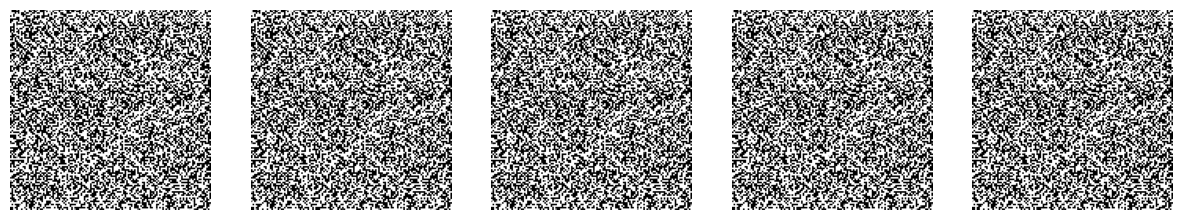

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Generate new images
num_images = 5  # Change this to generate more images
latent_dim = 100  # Make sure this matches your GAN model

# Generate random noise
random_noise = tf.random.normal([num_images, latent_dim])

# Generate images
generated_images = generator(random_noise, training=False)  # Output shape: (num_images, 128, 128, 1)

# Convert images to numpy array and normalize them from [-1,1] to [0,1]
generated_images = (generated_images.numpy() * 0.5) + 0.5  # Rescale from [-1,1] to [0,1]

# Plot the generated images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    ax = axes[i]
    ax.imshow(generated_images[i, :, :, 0], cmap="gray")  # Show grayscale image
    ax.axis("off")

plt.show()


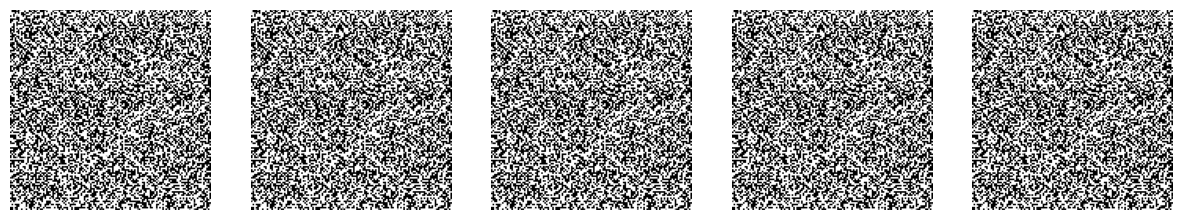

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Generate new images
num_images = 5  # Change this to generate more images
latent_dim = 100  # Make sure this matches your GAN model

# Generate random noise
random_noise = tf.random.normal([num_images, latent_dim])

# Generate images
generated_images = generator(random_noise, training=False)  # Output shape: (num_images, 128, 128, 1)

# Convert images to numpy array and normalize them from [-1,1] to [0,1]
generated_images = (generated_images.numpy() * 0.5) + 0.5  # Rescale from [-1,1] to [0,1]

# Plot the generated images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    ax = axes[i]
    ax.imshow(generated_images[i, :, :, 0], cmap="gray")  # Show grayscale image
    ax.axis("off")

plt.show()


In [ ]:
# Part 2


import tensorflow as tf
from tensorflow.keras import layers

latent_dim = 100

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256 * 16 * 16, activation="relu", input_dim=latent_dim),
        layers.Reshape((16, 16, 256)),  # Start with a 16x16 feature map

        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),
        layers.BatchNormalization(),

        layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu"),
        layers.BatchNormalization(),

        layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding="same", activation="relu"),
        layers.BatchNormalization(),

        layers.Conv2DTranspose(1, kernel_size=4, strides=1, padding="same", activation="tanh")  # Output: (128,128,1)
    ])

    print(f"✅ Generator Output Shape: {model.output_shape}")
    return model

generator = build_generator()


✅ Generator Output Shape: (None, 128, 128, 1)


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(128, 128, 1)),

        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),  # Reduce overfitting

        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])

    print(f"✅ Discriminator Input Shape: {model.input_shape}")
    return model

discriminator = build_discriminator()


✅ Discriminator Input Shape: (None, 128, 128, 1)


In [ ]:
generator = build_generator()
discriminator = build_discriminator()

# 🔥 Use Adam optimizer with Clipping (WGAN)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

discriminator.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
discriminator.trainable = False

gan_input = layers.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
validity = discriminator(generated_image)

gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer=opt, loss="binary_crossentropy")


✅ Generator Output Shape: (None, 128, 128, 1)
✅ Discriminator Input Shape: (None, 128, 128, 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

save_dir = "generated_images"
os.makedirs(save_dir, exist_ok=True)

def save_generated_images(epoch):
    noise = tf.random.normal([1, latent_dim])
    gen_image = generator(noise, training=False).numpy()

    gen_image = (gen_image * 0.5) + 0.5  # Rescale to [0,1]
    plt.imsave(f"{save_dir}/epoch_{epoch}.png", gen_image[0, :, :, 0], cmap="gray")

# Train loop modification
for epoch in range(1000):  # 🔥 Train for 5000+ epochs
    train_gan()  # Your training function
    if epoch % 100 == 0:  # Save every 500 epochs
        save_generated_images(epoch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Epoch 0 - D Loss: 0.676646888256073 - G Loss: 0.705633282661438
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1

KeyboardInterrupt: 

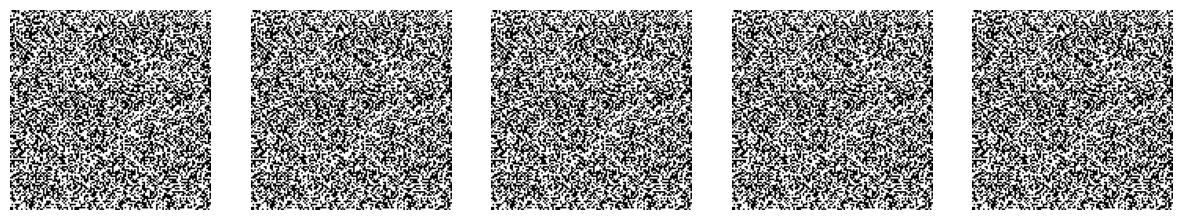

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Generate new images
num_images = 5  # Change this to generate more images
latent_dim = 100  # Make sure this matches your GAN model

# Generate random noise
random_noise = tf.random.normal([num_images, latent_dim])

# Generate images
generated_images = generator(random_noise, training=False)  # Output shape: (num_images, 128, 128, 1)

# Convert images to numpy array and normalize them from [-1,1] to [0,1]
generated_images = (generated_images.numpy() * 0.5) + 0.5  # Rescale from [-1,1] to [0,1]

# Plot the generated images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    ax = axes[i]
    ax.imshow(generated_images[i, :, :, 0], cmap="gray")  # Show grayscale image
    ax.axis("off")

plt.show()